DecisionTree


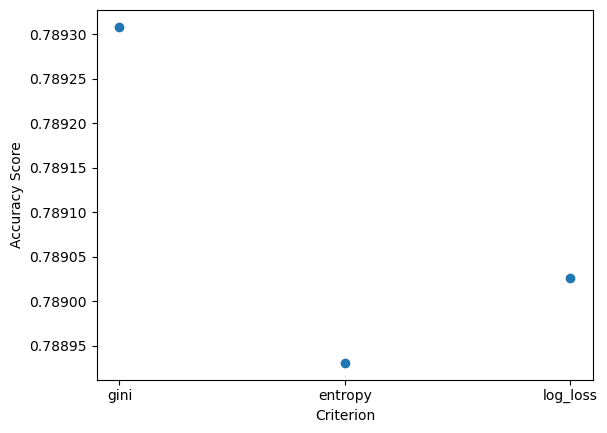

Accuracy: 0.8086215063950735
Precision: 0.8091304826283647
Recall: 0.8086215063950735

Confusion Matrix:
[[1060  176   31]
 [ 147  612    8]
 [  36    6   35]]


RandomForest
------------------------------------
Accuracy: 0.8597820937944103
Precision: 0.8593051570191135
Recall: 0.8597820937944103

Confusion Matrix:
[[1127  133    7]
 [ 110  656    1]
 [  34   11   32]]


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import json

path = "dataset/normalized/"

df = pd.read_csv(path + "kart.csv")

# Split the data into features (X) and target (y)
X = df.drop('action', axis=1)
y = df['action']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("DecisionTree")
criterion_values = ["gini", "entropy", "log_loss"]
scores = []
for criterion in criterion_values:
    clf = DecisionTreeClassifier(criterion=criterion)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x=criterion_values, y=scores, marker='o')
plt.xlabel("Criterion")
plt.ylabel("Accuracy Score")
plt.show()

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion=criterion_values[np.argmax(scores)])

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Metricas
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

# Guardar los atributos en un diccionario
tree_structure = {
    'n_nodes': clf.tree_.node_count,
    'children_left': clf.tree_.children_left.tolist(),
    'children_right': clf.tree_.children_right.tolist(),
    'feature': clf.tree_.feature.tolist(),
    'threshold': clf.tree_.threshold.tolist(),
    'values': clf.tree_.value.tolist(),
}

with open('decision_tree_structure.json', 'w') as file:
    json.dump(tree_structure, file)

print("\n\nRandomForest")
print("------------------------------------")

#obtenidos con RandomizedSearchCV
rf = RandomForestClassifier(max_depth=11, n_estimators=297)
rf.fit(X_train, y_train)

# Metricas
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)